In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import os
import sys

sys.path.insert(0, os.getenv("HOME") + "/pycode/MscThesis/")
from amftrack.pipeline.functions.post_processing.extract_study_zone import *
import pandas as pd
import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.paths.directory import (
    run_parallel,
    find_state,
    directory_scratch,
    directory_project,
)
from amftrack.notebooks.analysis.util import *
from scipy import stats
from scipy.ndimage.filters import uniform_filter1d
from collections import Counter
from IPython.display import clear_output
from amftrack.notebooks.analysis.data_info import *
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
plt.rcParams.update(
    {"font.family": "verdana", "font.weight": "normal", "font.size": 20}
)
from amftrack.plotutil import plot_node_skel
from amftrack.notebooks.validation.util import *
from amftrack.pipeline.paths.directory import *
from amftrack.util.sys import *
import pickle
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.post_processing.time_hypha import *
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
    load_graphs,
    load_skel,
    plot_raw_plus,
)
from amftrack.pipeline.functions.image_processing.experiment_class_surf import Edge

from shapely.geometry import Polygon, shape, Point
from scipy import spatial
from sklearn.preprocessing import StandardScaler

/home/cbisot/pycode/MscThesis/amftrack/transfer/functions/transfer.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Text(0, 1, 'test')

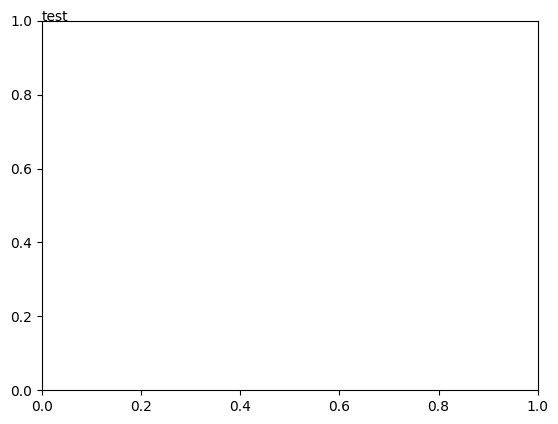

In [2]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.text(0,1,'test', font =None)

In [2]:
directory = directory_project
# update_analysis_info(directory)
analysis_info = get_analysis_info(directory)

In [3]:
select = analysis_info
plate = 94
rows = [row for (index, row) in select.iterrows()]
for index, row in enumerate(rows):
    path = f'{directory}{row["folder_analysis"]}'
    try:
        a = np.load(f"{path}/center.npy")
    except:
        pass
    if row["Plate"] == plate:
        path_exp = f'{directory}{row["path_exp"]}'
        exp = pickle.load(open(path_exp, "rb"))
        exp.dates.sort()
        break

In [4]:
exp.labeled = True
load_study_zone(exp)
load_graphs(exp, indexes=[0])

In [5]:
%autoreload 2
time_plate_info, global_hypha_info, time_hypha_info = get_data_tables(redownload=True)

In [97]:
t = choice(range(exp.ts))
nodes = [
    node
    for node in exp.nodes
    if node.is_in(t) and np.all(is_in_study_zone(node, t, 1000, 200))
]
tips = [
    node
    for node in nodes
    if node.degree(t) == 1 and node.is_in(t + 1) and len(node.ts()) > 2
]
growing_tips = [
    node for node in tips if np.linalg.norm(node.pos(t) - node.pos(node.ts()[-1])) >= 40
]
growing_rhs = [
    node
    for node in growing_tips
    if np.linalg.norm(node.pos(node.ts()[0]) - node.pos(node.ts()[-1])) >= 1500
]
stop_tips = [
    tip
    for tip in growing_rhs
    if np.linalg.norm(tip.pos(t + 1) - tip.pos(tip.ts()[-1])) <= 40
    and tip.ts()[-1] != t + 1
    and tip.degree(t + 1) == 1
]
anas_tips = [
    tip
    for tip in growing_tips
    if tip.degree(t) == 1
    and tip.degree(t + 1) == 3
    and 1 not in [tip.degree(t) for t in [tau for tau in tip.ts() if tau > t]]
]
print(len(stop_tips)), print(len(anas_tips))

0
4


(None, None)

In [110]:
node_list = [tip.label for tip in anas_tips]

In [132]:
node_list = [choice(anas_tips).label]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


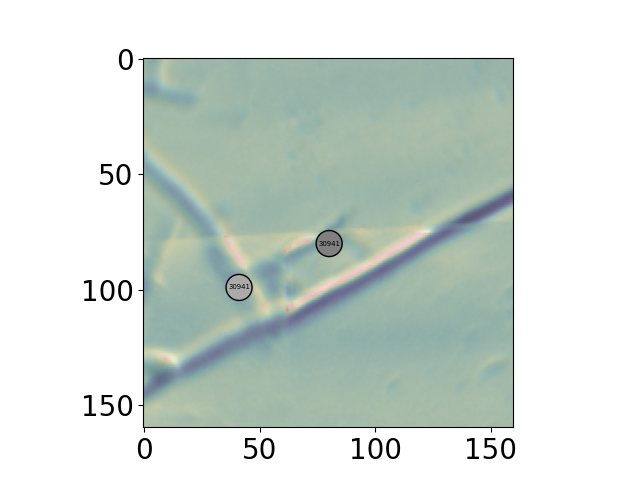

In [133]:
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
    load_graphs,
    load_skel,
    plot_raw_plus,
)

%load_ext autoreload
%autoreload 2
plt.close("all")
fig, ax, center, radius = plot_raw_plus(exp, t, node_list, radius_imp=200)
fig, ax, center, radius = plot_raw_plus(
    exp, t + 1, node_list, fig=fig, ax=ax, center=center, radius_imp=radius, n=1
)
fig, ax, center, radius = plot_raw_plus(
    exp, t + 4, node_list, fig=fig, ax=ax, center=center, radius_imp=radius, n=2
)

plt.save()

In [121]:
np.max(np.transpose(((0, 0), (-1, -1))), axis=1)

array([0, 0])

In [87]:
node_list

[36859, 38447, 40145]

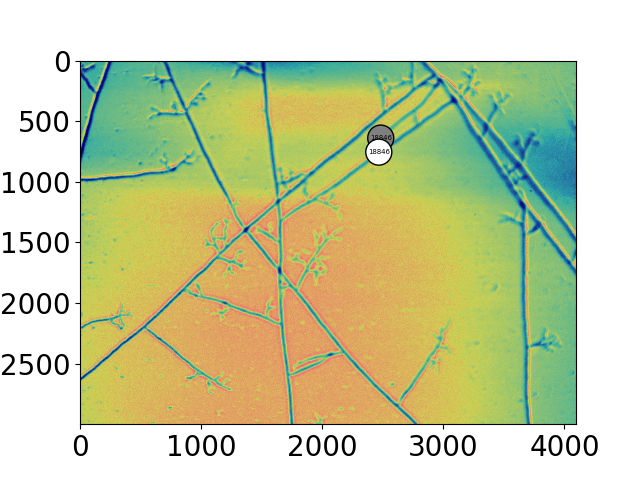

In [54]:
tip2.show_source_image(t, t + 1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(array([981, 201]), array([5704, 4924]))
(array([981, 201]), array([5704, 4924]))


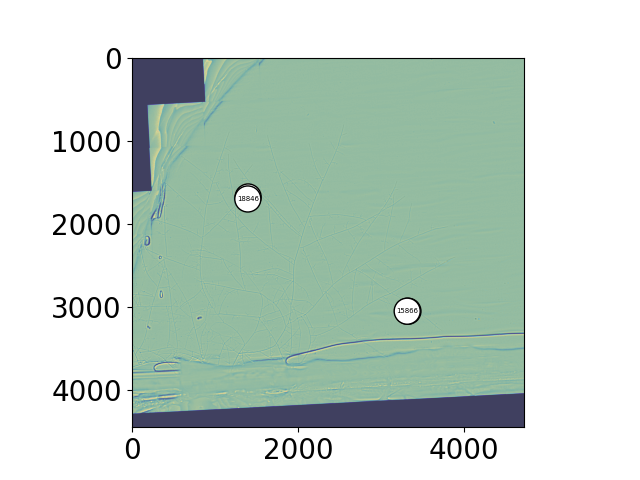

In [81]:
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
    load_graphs,
    load_skel,
    plot_raw_plus,
)

%load_ext autoreload
%autoreload 2
# plt.close("all")
fig, ax, center, radius = plot_raw_plus(exp, t, node_list)
fig, ax, center, radius = plot_raw_plus(
    exp, t + 1, node_list, fig=fig, ax=ax, center=center, radius=radius
)
# fig,ax = plot_raw_plus(exp,t+2,node_list,fig=fig,ax=ax)

plt.show()

In [56]:
node_list

[15866, 18846]

In [ ]:
date = self.dates[t]
directory_name = get_dirname(date, self.plate)
path_snap = self.directory + directory_name
path_tile = path_snap + "/Img/TileConfiguration.txt.registered"
skel = read_mat(path_snap + "/Analysis/skeleton_pruned_realigned.mat")
Rot = skel["R"]
trans = skel["t"]
rottrans = np.dot(np.linalg.inv(Rot), np.array([xs, ys] - trans))
ys, xs = round(rottrans[0]), round(rottrans[1])

In [ ]:
date = exp.dates[t]
directory_name = get_dirname(date, exp.plate)
path_snap = exp.directory + directory_name
im = read_mat(path_snap + "/Analysis/raw_image.mat")["raw"]
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.imshow(im, cmap="gray")

In [7]:
plt.close("all")
for tip in stop_tips:
    t0 = tip.ts()[0]
    t0 = t
    tip.show_source_image(t, t + 4)

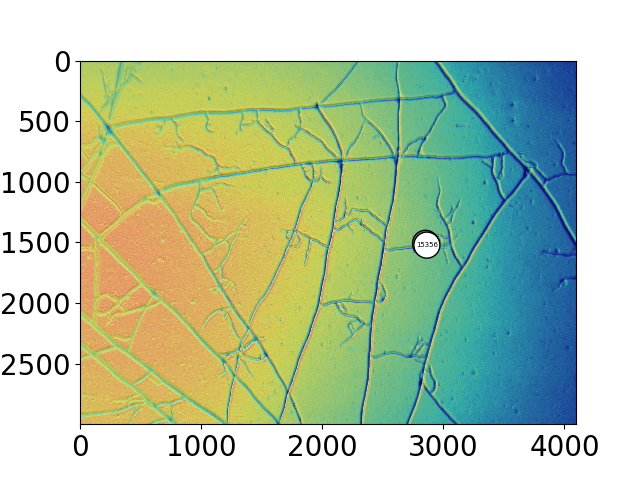

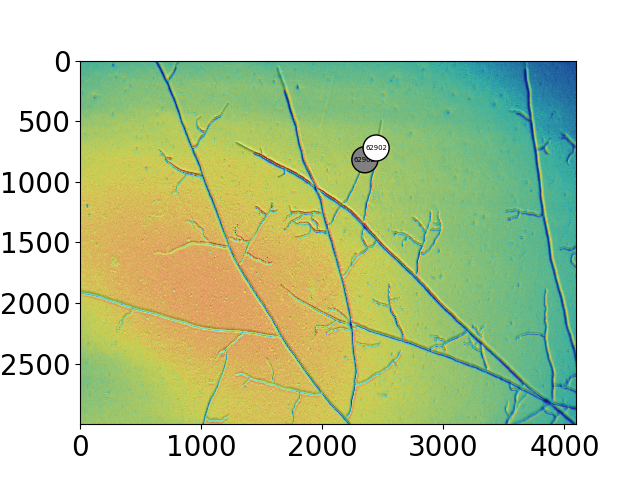

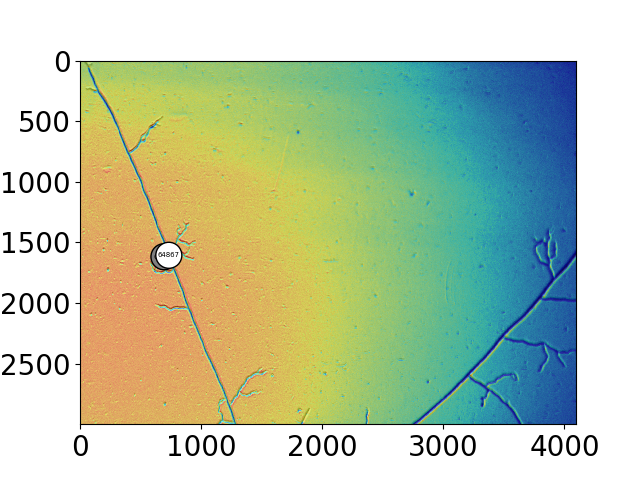

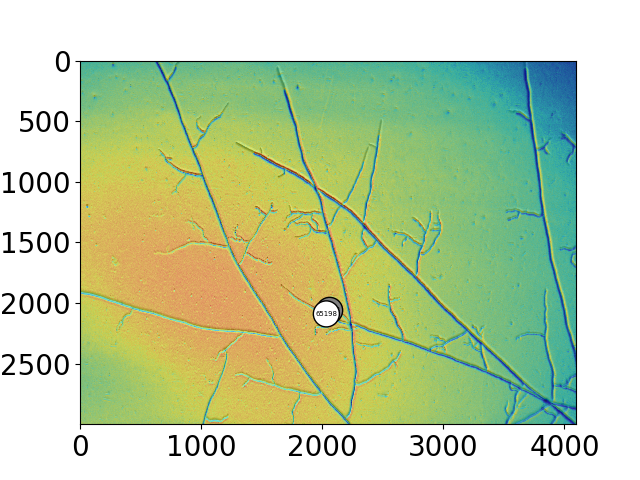

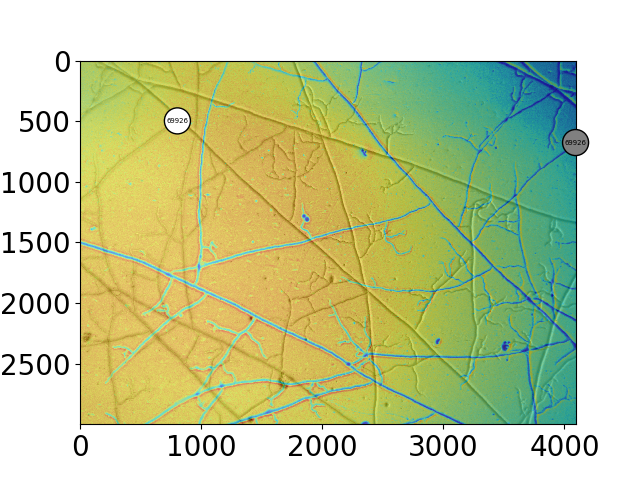

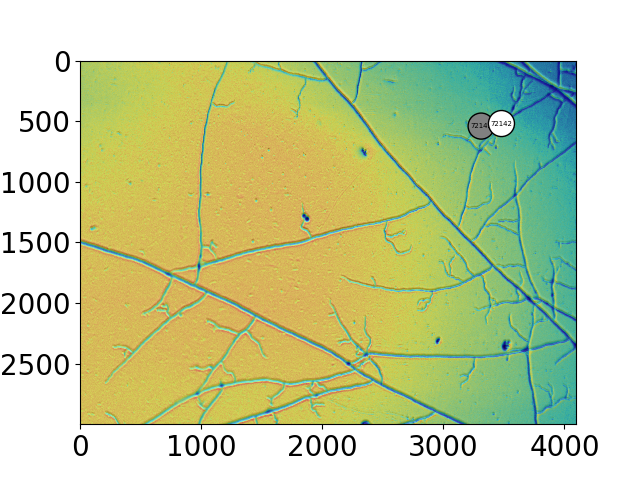

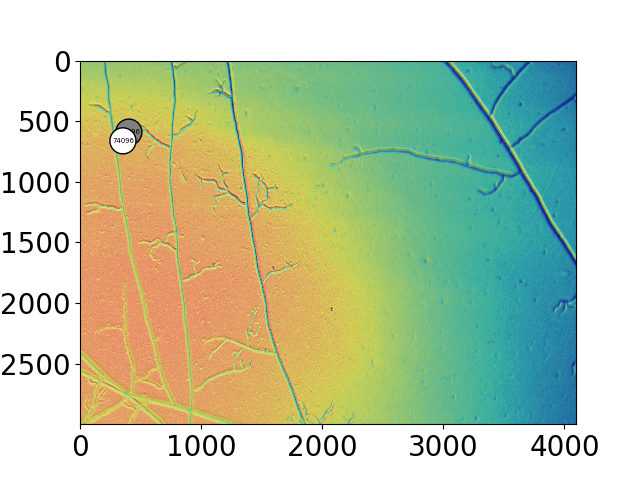

In [20]:
plt.close("all")
for tip in anas_tips:
    t0 = tip.ts()[0]
    t0 = t
    tip.show_source_image(t, t + 1)

In [24]:
tip = choice(stop_tips)

In [25]:
np.linalg.norm(tip.pos(t + 1) - tip.pos(tip.ts()[-1]))

0.0

In [36]:
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Edge,
    Node,
)
from amftrack.pipeline.functions.post_processing.util import (
    get_length_um_edge,
    is_in_study_zone,
)
import numpy as np
from scipy import spatial
from shapely.geometry import Polygon, shape
import networkx as nx
from amftrack.util.sys import *


def get_length_study_zone(exp, t, args):
    length = 0
    for edge in exp.nx_graph[t].edges:
        edge_obj = Edge(Node(edge[0], exp), Node(edge[1], exp), exp)
        is_in_end = np.all(is_in_study_zone(edge_obj.end, t, 1000, 150))
        is_in_begin = np.all(is_in_study_zone(edge_obj.begin, t, 1000, 150))
        if is_in_end and is_in_begin:
            length += get_length_um_edge(edge_obj, t)
    return ("tot_length_study", length)


def get_length_study_zone_rough(exp, t, args):
    length = 0
    for edge in exp.nx_graph[t].edges:
        edge_obj = Edge(Node(edge[0], exp), Node(edge[1], exp), exp)
        is_in_end = np.all(is_in_study_zone(edge_obj.end, t, 1000, 150))
        is_in_begin = np.all(is_in_study_zone(edge_obj.begin, t, 1000, 150))
        if is_in_end and is_in_begin:
            length += (
                np.linalg.norm(edge_obj.end.pos(t) - edge_obj.begin.pos(t)) * 1.725
            )
    return ("tot_length_study_rough", length)


def get_area_study_zone(exp, t, args):
    nodes = np.array(
        [
            node.pos(t)
            for node in exp.nodes
            if node.is_in(t) and np.all(is_in_study_zone(node, t, 1000, 150))
        ]
    )
    if len(nodes) > 3:
        hull = spatial.ConvexHull(nodes)
        poly = Polygon([nodes[vertice] for vertice in hull.vertices])
        area = poly.area * 1.725**2 / (1000**2)
    else:
        area = 0
    return ("area_study", area)

In [56]:
t = 99
load_graphs(exp, indexes=[t])

In [57]:
args = None
get_length_study_zone_rough(exp, t, args), get_length_study_zone(exp, t, args)

(('tot_length_study_rough', 2050485.023449418),
 ('tot_length_study', 2106229.2543717455))

In [58]:
nodes = [
    node
    for node in exp.nodes
    if node.is_in(t) and np.all(is_in_study_zone(node, t, 1000, 150))
]
edges = {
    edge
    for node in nodes
    for edge in node.edges(t)
    if edge.end in nodes and edge.begin in nodes
}
tot_length = np.sum(
    [np.linalg.norm(edge.end.pos(t) - edge.begin.pos(t)) * 1.725 for edge in edges]
)
tot_length

2050485.0234494135

In [59]:
def get_regular_hulls_area_fixed(exp, ts, incr):
    path = (
        directory_scratch + f"temp/hulls_{exp.plate}_{incr}_"
        f"{exp.dates[0].strftime('%m%d%Y%H:%M:%S')}.pick"
    )
    if os.path.isfile(path):
        (regular_hulls, indexes) = pickle.load(open(path, "rb"))
    else:
        hulls = get_hulls(exp, ts)
        areas = [np.sum(hull.area) * 1.725**2 / (1000**2) for hull in hulls]
        area_incr = areas[-1] - areas[0]
        num = int(area_incr / incr)
        regular_hulls = [hulls[0]]
        init_area = areas[0]
        indexes = [0]
        current_area = init_area
        for i in range(num - 1):
            current_area += incr
            index = min([i for i in range(len(areas)) if areas[i] >= current_area])
            indexes.append(index)
            regular_hulls.append(hulls[index])

        # pickle.dump((regular_hulls,indexes), open(path,"wb"))
    return (regular_hulls, indexes)


def get_nodes_in_ring(hull1, hull2, t, exp):
    nodes = [
        node
        for node in exp.nodes
        if node.is_in(t)
        and hull2.contains(Point(node.pos(t)))
        and not hull1.contains(Point(node.pos(t)))
        and np.all(is_in_study_zone(node, t, 1000, 200))
    ]
    return nodes


def get_length_in_ring(hull1, hull2, t, exp):
    nodes = get_nodes_in_ring(hull1, hull2, t, exp)
    edges = {edge for node in nodes for edge in node.edges(t)}
    tot_length = np.sum(
        [np.linalg.norm(edge.end.pos(t) - edge.begin.pos(t)) * 1.725 for edge in edges]
    )
    return tot_length


def ring_area(hull1, hull2):
    return np.sum(hull2.difference(hull1).area) * 1.725**2 / (1000**2)


hulls, indexes = get_regular_hulls_area_fixed(exp, range(exp.ts), 100)

In [60]:
ls = [get_length_in_ring(hulls[i], hulls[i + 1], t, exp) for i in range(len(hulls) - 1)]
areas = [ring_area(hulls[i], hulls[i + 1]) for i in range(len(hulls) - 1)]

In [68]:
areas, ls[:19]

([104.11299391324945,
  108.94734216443791,
  99.02930181170379,
  92.72295497317826,
  101.04371351743832,
  138.61840972139385,
  74.40844427654729,
  106.45466749747463,
  83.53322789441421,
  112.94363752306666,
  97.4002893275669,
  90.62085838745266,
  111.09370968009031,
  106.735669957521,
  95.29394978410988],
 [149703.2943395489,
  196955.11722889965,
  174454.98647626338,
  166926.18859633768,
  178212.9267502594,
  202673.12503340613,
  155000.33619924623,
  195533.13937589782,
  143146.3805590261,
  207580.8205108684,
  185609.39605086774,
  159905.68244344118,
  191235.87813479372,
  118544.82257555591,
  89614.78333115806])

In [69]:
np.sum(ls), get_area_study_zone(exp, t, args)[1], np.sum(ls) / get_area_study_zone(
    exp, t, args
)[1], np.sum(areas[:19]), np.sum(ls[:19]) / np.sum(areas[:19])

(2515096.8776055705,
 1964.216524069688,
 1396.0714398446057,
 1522.9591704296452,
 1651.453910544451)

In [74]:
get_area_study_zone(exp, t, args)[1], np.sum(areas)

(1801.5531339037502, 1522.9591704296452)

In [70]:
np.mean((np.array(ls) / np.array(areas))[:19])

1663.166044928939

In [71]:
(np.array(ls) / np.array(areas))[:19]

array([1437.8925119 , 1807.80102861, 1761.65017106, 1800.26821454,
       1763.72107226, 1462.09385493, 2083.10142359, 1836.77375518,
       1713.64598457, 1837.91513239, 1905.63495583, 1764.55713716,
       1721.39249545, 1110.63923263,  940.40370385])